In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD



In [ ]:
df = pd.read_csv('preprocessed_uav_navigation_dataset.csv')

print("Dataset Overview:")
print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        5000 non-null   float64
 1   longitude       5000 non-null   float64
 2   altitude        5000 non-null   float64
 3   imu_acc_x       5000 non-null   float64
 4   imu_acc_y       5000 non-null   float64
 5   imu_acc_z       5000 non-null   float64
 6   imu_gyro_x      5000 non-null   float64
 7   imu_gyro_y      5000 non-null   float64
 8   imu_gyro_z      5000 non-null   float64
 9   lidar_distance  5000 non-null   float64
 10  speed           5000 non-null   float64
dtypes: float64(11)
memory usage: 429.8 KB
None


In [22]:
# Define sensor data matrix (trajectory-related features)
sensor_columns = ['latitude', 'longitude', 'altitude', 
                  'imu_acc_x', 'imu_acc_y', 'imu_acc_z', 
                  'imu_gyro_x', 'imu_gyro_y', 'imu_gyro_z',
                  'lidar_distance', 'speed']
A = df[sensor_columns].values


In [23]:
# Apply Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=3)  # Keeping only the top 3 components
A_reduced = svd.fit_transform(A)
A_reconstructed = svd.inverse_transform(A_reduced)

# Convert back to DataFrame
df_svd = pd.DataFrame(A_reconstructed, columns=sensor_columns)

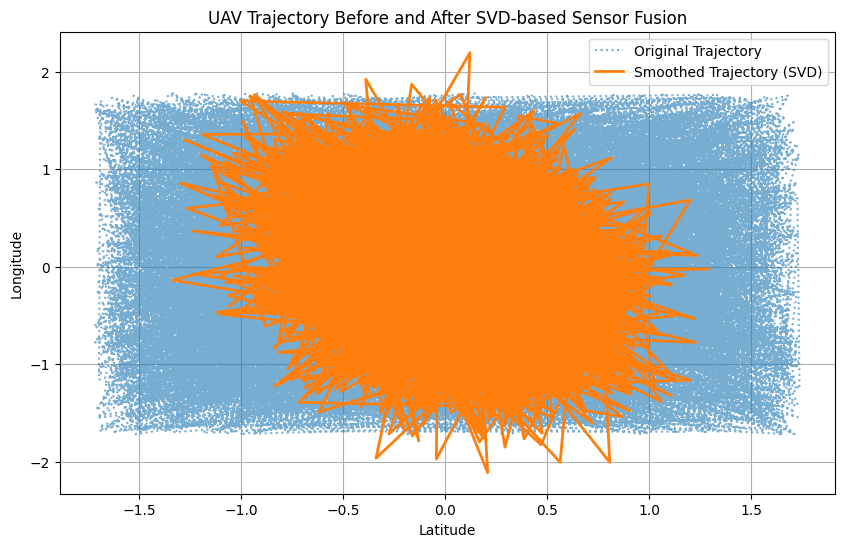

In [25]:
# Visualizing the original vs. smoothed trajectory
plt.figure(figsize=(10, 6))
plt.plot(df['latitude'], df['longitude'], label='Original Trajectory', linestyle='dotted', alpha=0.6)
plt.plot(df_svd['latitude'], df_svd['longitude'], label='Smoothed Trajectory (SVD)', linewidth=2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("UAV Trajectory Before and After SVD-based Sensor Fusion")
plt.legend()
plt.grid()
plt.show()

# Save the denoised trajectory
df_svd.to_csv('svd_denoised_uav_trajectory.csv', index=False)